In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
from scipy.stats import linregress

In [2]:
#PART 1: Weather Py

In [4]:
#from api_keys import g_key
from api_keys import api_key, g_key

In [4]:
file_path = 'worldcities.csv'
cities_data = pd.read_csv(file_path)
cities_data.head(2)

,Country,City,Latitude,Longitude
0,ad,andorra la vella,42.500000,1.516667
1,ad,canillo,42.566667,1.600000


In [5]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f"{url}appid={api_key}&units={units}&q="
cities = cities_data['City'].sample(550)

In [6]:
lat = []
lng = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
not_found = []
countries = []

for city in cities:
    try:
        target_url = query_url + city
        response = requests.get(target_url).json()
    
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temperature.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
    except KeyError:
        not_found.append(city)
        print(f"The city of {city.title()} could not be found in our dataset.")

The city of Of could not be found in our dataset.
The city of Shibarghan could not be found in our dataset.
The city of Qiryat Atta could not be found in our dataset.
The city of Abiy Adi could not be found in our dataset.
The city of Krasnyy Mayak could not be found in our dataset.
The city of Saundatti Yellamma could not be found in our dataset.
The city of Jamnah could not be found in our dataset.
The city of Houlung could not be found in our dataset.
The city of Kroderen could not be found in our dataset.
The city of El Tizatillo could not be found in our dataset.
The city of Copandaro could not be found in our dataset.
The city of Erithrai could not be found in our dataset.
The city of Laguindingan could not be found in our dataset.
The city of Masandra could not be found in our dataset.
The city of Puunsi could not be found in our dataset.
The city of Cruden Bay could not be found in our dataset.
The city of Illoqqortoormiut could not be found in our dataset.
The city of Orkhomen

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Charles Hilgeman\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-0297bac66320>", line 13, in <module>
    response = requests.get(target_url).json()
  File "C:\Users\Charles Hilgeman\anaconda\anaconda3\lib\site-packages\requests\api.py", line 76, in get
    return request('get', url, params=params, **kwargs)
  File "C:\Users\Charles Hilgeman\anaconda\anaconda3\lib\site-packages\requests\api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)
  File "C:\Users\Charles Hilgeman\anaconda\anaconda3\lib\site-packages\requests\sessions.py", line 542, in request
    resp = self.send(prep, **send_kwargs)
  File "C:\Users\Charles Hilgeman\anaconda\anaconda3\lib\site-packages\requests\sessions.py", line 655, in send
    r = adapter.send(request, **kwargs)
  File "C:\Users\Charles Hilgeman

TypeError: object of type 'NoneType' has no len()

In [45]:
found_cities = pd.DataFrame({'Found': cities}).reset_index().drop(columns = 'index')
found_cities = found_cities[~found_cities['Found'].isin(not_found)]
found_cities = found_cities.reset_index().drop(columns = 'index')
found = found_cities['Found']

In [49]:
weather_sample = pd.DataFrame({'City': found,
                               'Country': countries,
                              'Latitude': lat,
                               'Longitude': lng,
                               'Temperature': temperature,
                              'Humidity': humidity,
                              'Cloudiness': cloudiness,
                              'Wind Speed': wind_speed
                              })
weather_sample.reset_index().drop(columns = 'index')
weather_sample.to_csv('output/weather_sample.csv')

In [50]:
weather_sample

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,san jose del golfo,GT,14.7628,-90.3764,85.64,47,17,3.38
1,maplewood,US,44.9530,-92.9952,90.32,56,1,9.22
2,tabinay,PH,13.4871,120.9566,79.97,79,100,7.72
3,sarankhola,BD,22.3082,89.7897,78.69,94,100,8.81
4,cusset,FR,46.1300,3.4596,63.88,93,96,2.64
...,...,...,...,...,...,...,...,...
526,caselle torinese,IT,45.1778,7.6426,72.19,83,75,4.61
527,fairbanks,US,64.8378,-147.7164,61.45,72,75,1.01
528,ostwald,FR,48.5437,7.7110,67.84,94,100,1.14
529,miravci,MK,41.3078,22.4350,76.01,52,4,4.27


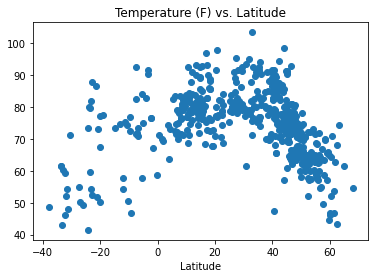

In [51]:
plt.scatter(weather_sample['Latitude'], weather_sample['Temperature'])
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/Temp_vs_Latitude.png')

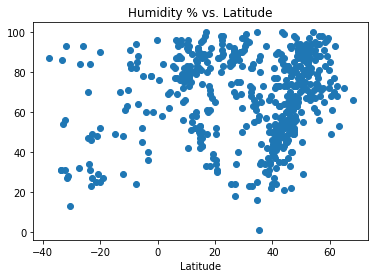

In [52]:
plt.scatter(weather_sample['Latitude'], weather_sample['Humidity'])
plt.title('Humidity % vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/Latitude_vs_Humidity.png')

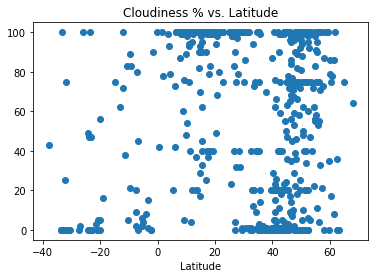

In [53]:
plt.scatter(weather_sample['Latitude'], weather_sample['Cloudiness'])
plt.title('Cloudiness % vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/Latitude_vs_Cloudiness.png')

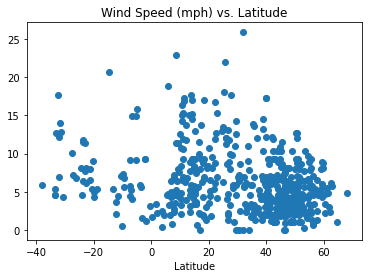

In [54]:
plt.scatter(weather_sample['Latitude'], weather_sample['Wind Speed'])
plt.title('Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/Latitude_vs_Wind_Speed.png')

In [55]:
north_data = weather_sample.loc[weather_sample['Latitude'] > 0]
north_data.to_csv('output/north_weather_sample.csv')

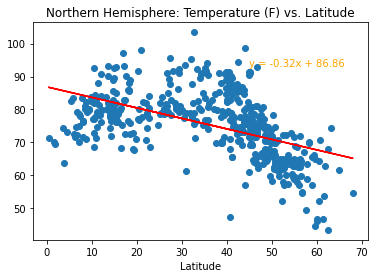

In [56]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Temperature'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(north_data['Latitude'], north_data['Temperature'])
plt.plot(north_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (45,93), fontsize = 10, color = 'orange')
plt.title('Northern Hemisphere: Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/North_Temp_vs_Latitude.png')

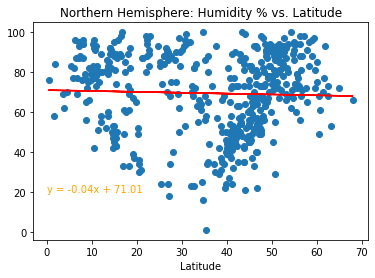

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Humidity'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(north_data['Latitude'], north_data['Humidity'])
plt.plot(north_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (0,20), fontsize = 10, color = 'orange')
plt.title('Northern Hemisphere: Humidity % vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/North_Latitude_vs_Humidity.png')

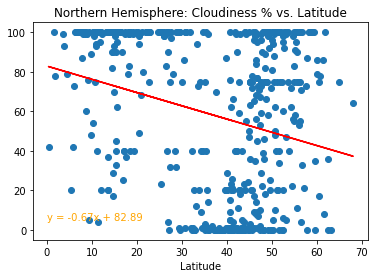

In [58]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Cloudiness'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(north_data['Latitude'], north_data['Cloudiness'])
plt.plot(north_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (0,5), fontsize = 10, color = 'orange')
plt.title('Northern Hemisphere: Cloudiness % vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/North_Latitude_vs_Cloudiness.png')

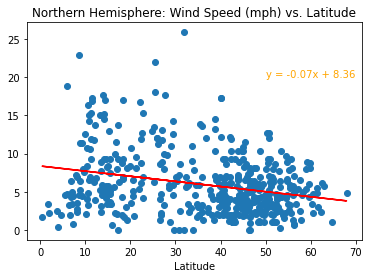

In [59]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_data['Latitude'], north_data['Wind Speed'])
regress_values = north_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(north_data['Latitude'], north_data['Wind Speed'])
plt.plot(north_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (50,20), fontsize = 10, color = 'orange')
plt.title('Northern Hemisphere: Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/North_Latitude_vs_Wind_Speed.png')

In [60]:
south_data = weather_sample.loc[weather_sample['Latitude'] < 0]
south_data.to_csv('output/south_weather_sample.csv')

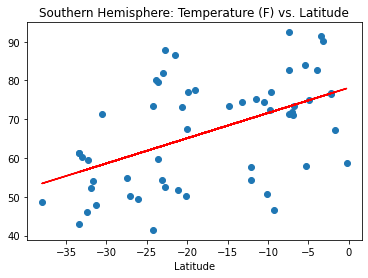

In [61]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Temperature'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(south_data['Latitude'], south_data['Temperature'])
plt.plot(south_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (-40,75), fontsize = 10, color = 'orange')
plt.title('Southern Hemisphere: Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/South_Temp_vs_Latitude.png')

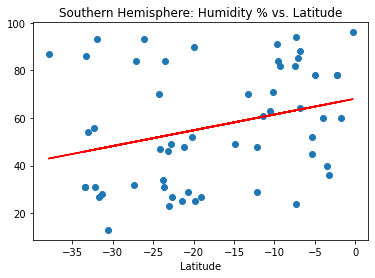

In [62]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Humidity'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(south_data['Latitude'], south_data['Humidity'])
plt.plot(south_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (-40,50), fontsize = 10, color = 'orange')
plt.title('Southern Hemisphere: Humidity % vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/South_Humidity_vs_Latitude.png')

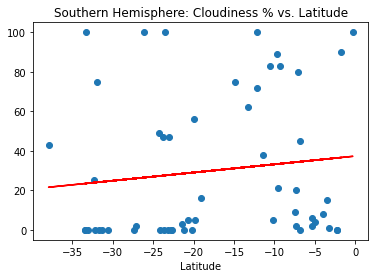

In [63]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Cloudiness'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(south_data['Latitude'], south_data['Cloudiness'])
plt.plot(south_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (-40,50), fontsize = 10, color = 'orange')
plt.title('Southern Hemisphere: Cloudiness % vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/South_Cloudiness_vs_Latitude.png')

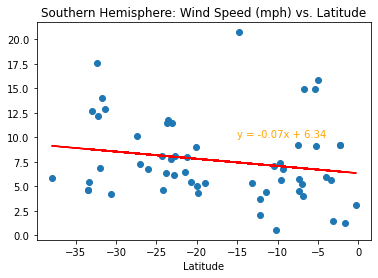

In [64]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_data['Latitude'], south_data['Wind Speed'])
regress_values = south_data['Latitude'] * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(south_data['Latitude'], south_data['Wind Speed'])
plt.plot(south_data['Latitude'], regress_values, 'r-')
plt.annotate(line_eq, (-15,10), fontsize = 10, color = 'orange')
plt.title('Southern Hemisphere: Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.savefig('output/South_Wind_Speed_vs_Latitude.png')

In [65]:
#PART 2: Vacation Py

In [ ]:
g_url = 'https://maps.googleapis.com/maps/api/place/nearbysearch/json'

In [67]:
weather_sample

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,san jose del golfo,GT,14.7628,-90.3764,85.64,47,17,3.38
1,maplewood,US,44.9530,-92.9952,90.32,56,1,9.22
2,tabinay,PH,13.4871,120.9566,79.97,79,100,7.72
3,sarankhola,BD,22.3082,89.7897,78.69,94,100,8.81
4,cusset,FR,46.1300,3.4596,63.88,93,96,2.64
...,...,...,...,...,...,...,...,...
526,caselle torinese,IT,45.1778,7.6426,72.19,83,75,4.61
527,fairbanks,US,64.8378,-147.7164,61.45,72,75,1.01
528,ostwald,FR,48.5437,7.7110,67.84,94,100,1.14
529,miravci,MK,41.3078,22.4350,76.01,52,4,4.27


In [69]:
locations = weather_sample[['Latitude','Longitude']]
weights = weather_sample['Humidity']
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations = locations, weights = weights, dissipating = False, max_intensity = 5, point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [70]:
ideal_start = weather_sample.loc[(weather_sample['Temperature'] > 70) & (weather_sample['Temperature'] <85)]
ideal_mid = ideal_start.loc[ideal_start['Wind Speed'] < 10]
ideal_data = ideal_mid.loc[ideal_mid['Cloudiness'] == 0]
ideal_data = ideal_data.reset_index().drop(columns = 'index')
ideal_data.head(2)

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,koprivstica,RS,43.2349,22.6205,73.02,55,0,3.91
1,negomiru,RO,44.8333,23.1667,77.16,45,0,3.42


In [71]:
ideal_data['Nearest Hotel'] = ""
ideal_data['Hotel Latitude'] = ""
ideal_data['Hotel Longitude'] = ""
ideal_data['Place'] = ""

params = {'keyword': 'hotel',
          'type': 'lodging',
          'radius': 5000,
         'key': g_key}

for index, row in ideal_data.iterrows():
        
    lats = row['Latitude']
    longs = row['Longitude']
    
    params['location'] = f"{lats},{longs}"
    
    hotel_start = requests.get(g_url, params=params)
    hotel_info = hotel_start.json()
    try:
        ideal_data.loc[index, 'Hotel Latitude'] = hotel_info['results'][0]['geometry']['location']['lat']
        ideal_data.loc[index, 'Hotel Longitude'] = hotel_info['results'][0]['geometry']['location']['lng']
        ideal_data.loc[index, 'Nearest Hotel'] = hotel_info['results'][0]['name']
        ideal_data.loc[index, 'Place'] = hotel_info['results'][0]['vicinity']
    except IndexError:
        ideal_data.loc[index, 'Hotel Latitude'] = np.nan
        ideal_data.loc[index, 'Hotel Longitude'] = np.nan
        ideal_data.loc[index, 'Nearest Hotel'] = np.nan
        ideal_data.loc[index, 'Place'] = np.nan

ideal_data




,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Nearest Hotel,Hotel Latitude,Hotel Longitude,Place
0,koprivstica,RS,43.2349,22.6205,73.02,55,0,3.91,NaN,NaN,NaN,NaN
1,negomiru,RO,44.8333,23.1667,77.16,45,0,3.42,NaN,NaN,NaN,NaN
2,fukue,JP,32.6881,128.8419,79.00,82,0,3.33,Campana Hotel,32.695431,128.84697,"1 Chome-1-1 Higashihamamachi, Goto"
3,rajka,HU,47.9964,17.1982,77.22,66,0,5.75,Ponteo Activity Park,48.041734,17.158248,"Starorímska 1a, Rusovce"
4,monaco-ville,FR,43.7310,7.4248,77.02,84,0,5.75,Les Terrasses d'Eze,43.732932,7.377234,"1138 Rte de la Turbie, Èze"
5,svoge,BG,42.9667,23.3500,77.70,54,0,2.01,Маймун Дере,42.962178,23.342898,"улица Воденицата 8, Svoge"
6,vetralla,IT,42.3098,12.0784,72.66,63,0,9.22,Olio Traldi - Traldi Resort Vetralla,42.342469,12.015025,"Strada Poggio Montano, 34, Vetralla"
7,vaasa,FI,63.0960,21.6158,74.26,53,0,5.75,Hotel Vallonia,63.112049,21.678975,"Centrumvägen 3, Korsholm"
8,kutahya,TR,39.4242,29.9833,71.55,68,0,4.09,Hilton Garden Inn Kutahya,39.420888,29.986209,"Servi, Atatürk Blv. No:21, Kütahya Merkez"
9,contesti,RO,43.8000,25.4833,75.65,42,0,6.73,NaN,NaN,NaN,NaN


In [72]:
ideal_data = ideal_data.dropna()

In [76]:
info_box_template = """
<dl>
<dt>Name</dt><dd>{Nearest Hotel}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
location_information = [info_box_template.format(**row) for index, row in ideal_data.iterrows()]

hotel_locs = ideal_data[['Hotel Latitude', 'Hotel Longitude']]
mark_layer = gmaps.marker_layer(hotel_locs,
                                info_box_content = location_information)
fig.add_layer(mark_layer)
fig

Figure(layout=FigureLayout(height='420px'))